In [ ]:
'''from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import time

def scrape_comments(url):
    Options = webdriver.ChromeOptions()
    Options.add_argument('--headless')
    driver = webdriver.Chrome(ChromeDriverManager().install(), options=Options)
    driver.get(url)
    time.sleep(5)
    prev_h = 0
    while True:
        height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
        driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 200})")
        # fix the time sleep value according to your network connection
        time.sleep(5)
        prev_h +=200  
        if prev_h >= height:
            break
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    driver.quit()
    title = soup.select_one('#container h1')
    print(title.text)
    comment_div = soup.select('#content content-text')
    comment_list = [x.text for x in comment_div]
    print(title, comment_list)

if __name__ == "__main__":

    urls = [
        "https://www.youtube.com/watch?v=gIwgSpEg6ZY",
    ]
    scrape_comments(urls[0])'''

'from selenium import webdriver\nfrom webdriver_manager.chrome import ChromeDriverManager\nfrom bs4 import BeautifulSoup\nimport time\n\ndef scrape_comments(url):\n    Options = webdriver.ChromeOptions()\n    Options.add_argument(\'--headless\')\n    driver = webdriver.Chrome(ChromeDriverManager().install(), options=Options)\n    driver.get(url)\n    time.sleep(5)\n    prev_h = 0\n    while True:\n        height = driver.execute_script("""\n                function getActualHeight() {\n                    return Math.max(\n                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),\n                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),\n                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)\n                    );\n                }\n                return getActualHeight();\n            """)\n        driver.execute_script(f"window.scrollTo({prev_h},{prev

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Text Cleaning**

In [ ]:
import pandas as pd
import re
from nltk import corpus
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from autocorrect import Speller 
from nltk import word_tokenize
#import unidecode 
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
dfs = pd.read_csv('/content/drive/MyDrive/Scrapped_Data/c_scraped.csv')
dfs.head()
#dfs.drop(['Unnamed: 0'], axis=1)

,Unnamed: 0,0
0,0,"When enterpreneurs become celebrities , India ..."
1,1,I need such 'Clarity of thoughts' in my life....
2,2,It takes a lot of courage to say 'NO'. Complet...
3,3,My respect for Mr Grover increased two folds a...
4,4,I do not think that any Shark rather than Ashn...


In [ ]:
#rename data frame column
dfs.columns = ['Index','comment']
dfs.head()

,Index,comment
0,0,"When enterpreneurs become celebrities , India ..."
1,1,I need such 'Clarity of thoughts' in my life....
2,2,It takes a lot of courage to say 'NO'. Complet...
3,3,My respect for Mr Grover increased two folds a...
4,4,I do not think that any Shark rather than Ashn...


In [ ]:
dfs['comment'] = dfs['comment'].replace("’", "'", regex=True)

In [ ]:
dfs["comment"].iloc[618]

"Raj to Narendra Modi: Sir there is one thing that connects the two of us. I also don't drink . \n\nNaMo: Tho Kare Chai pe Charcha"

In [ ]:
#different counts
stop = stopwords.words('english')

#word_Count
dfs['word_Count'] = dfs['comment'].apply(lambda x: len(str(x).split()))

#digit_Count
dfs['Digit_Count'] = dfs['comment'].apply(lambda x: len([t for t in str(x).split() if t.isdigit()]))
#unique_Word_count
dfs['unique_word_Count'] = dfs['comment'].apply(lambda x:len(set(str(x).split())))

#stopwords_Count
dfs['count_stop_words']=dfs['comment'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop]))

# char_count
dfs['char_count'] = dfs['comment'].apply(lambda x: len(str(x)))

# hashtag_count
dfs['hashtag_count'] = dfs['comment'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
dfs['mention_count'] = dfs['comment'].apply(lambda x: len([c for c in str(x) if c == '@']))

# punctuation_count
dfs['punctuation_count'] = dfs['comment'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count
67,67,Very few podcast would top this. Thank you for...,21,0,20,8,116,0,0,3
2238,2238,No phar. Maaa is harmed here,6,0,6,3,28,0,0,1
1310,1310,Fastest 90 Min of my life. No Cap.,8,1,8,3,34,0,0,2
2268,2268,Thank you,2,0,2,1,9,0,0,0
1093,1093,Great conversation Founder spell check,5,0,5,0,39,0,0,0


**Lower casing ✅<br>
Punctuation free text ✅<br>
Stop word removal ✅<br> 
Removing numerical data from the text ✅<br>
Removing multiple whitespaces from the text ✅<br>
Removing duplicate characters from the word ✅<br>
Tokenization✅<br>
Lemmatization✅<br>
Stemming✅<br>
Parts Of speech<br>
contractions ✅<br>
spell -check**

In [ ]:
def cleaning(df_col):
  """ lower case , remove Special character except , . and remove \n \t \\"""
  df_col = df_col.str.lower()
  df_col = df_col.replace(r"[^a-zA-Z:,%$']+", ' ', regex=True)
  df_col = df_col.replace(r'\n\\n\t\\', ' ', regex=True)
  df_col = df_col.replace("(.)\\1{2,}", "\\1", regex=True)
  # (.) match and capture any single character
  # \1{2,} then match the same character two or more times
  # \1 represents the first capture group

  return df_col

dfs['comment'] = cleaning(dfs['comment'])


In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count
2253,2253,just coz of 'ashneer grover' this video is goi...,15,0,14,7,70,0,0,2
323,323,: his brutal honesty is most epic part where ...,16,0,14,9,78,0,0,1
1683,1683,": : , : , : , : , : : , : , : , : , : : , : :...",1,0,1,0,83,0,0,29
1215,1215,can you please make a video on profitable unic...,11,0,11,5,61,0,0,2
1602,1602,a man of parts,4,0,4,2,15,0,0,1


In [ ]:
dfs['comment'].iloc[618]

"raj to narendra modi: sir there is one thing that connects the two of us i also don't drink namo: tho kare chai pe charcha"

In [ ]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
x= "i don't like life"
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [ ]:
cont_to_exp(x)

'i do not like life'

In [ ]:
%%timeit
dfs["comment"] = dfs["comment"].apply(lambda x: cont_to_exp(x))

96 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
dfs['comment'].iloc[618]

'raj to narendra modi: sir there is one thing that connects the two of us i also do not drink namo: tho kare chai pe charcha'

In [ ]:
st = 'i am jronman'
def spelling(st):
    spell = Speller(lang='en')
    Corrected_text = spell(st)
    return Corrected_text

In [ ]:
spelling(st)
#dfs["comment"] = dfs["comment"].apply(lambda st: spelling(st))

'i am ironman'

**Remove Stop Words**

In [ ]:
#filling the null values so that program will not give us a error
dfs['comment'] = dfs['comment'].fillna("")
stop = stopwords.words('english')
dfs['comment_wt_stopwords'] = dfs['comment'].apply(lambda x:' '.join([t for t in x.split() if t not in stop]))

In [ ]:
dfs

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords
0,0,"when enterpreneurs become celebrities , india ...",11,0,11,4,67,0,0,2,"enterpreneurs become celebrities , india right..."
1,1,i need such 'clarity of thoughts' in my life n...,14,0,14,7,78,0,0,3,need 'clarity thoughts' life need businessmen ...
2,2,it takes a lot of courage to say 'no' complete...,18,0,16,8,88,0,0,5,takes lot courage say 'no' completely agree as...
3,3,my respect for mr grover increased two folds a...,20,0,20,7,119,0,0,3,respect mr grover increased two folds listenin...
4,4,i do not think that any shark rather than ashn...,37,0,33,19,193,0,0,3,think shark rather ashneer talk openly secret ...
...,...,...,...,...,...,...,...,...,...,...,...
2336,2336,full on copy of beer biceps,5,0,5,1,27,0,0,1,full copy beer biceps
2337,2337,baap,1,0,1,0,5,0,0,1,baap
2338,2338,wow inko mujhe dekhna tha,5,0,5,0,26,0,0,0,wow inko mujhe dekhna tha
2339,2339,: : vineeta,3,0,3,0,16,0,1,3,: : vineeta


**Tokenization**

In [ ]:
#dfs['tokenized_sents'] = dfs["comment"].apply(nltk.word_tokenize)
dfs['tokenized_sents'] = dfs.apply(lambda row: nltk.word_tokenize(row['comment']), axis=1)

In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords,tokenized_sents
2300,2300,ashneer pe fida hogaye,4,0,4,0,22,0,0,0,ashneer pe fida hogaye,"[ashneer, pe, fida, hogaye]"
2292,2292,could not have guessed he is such a fraud was ...,13,0,12,8,68,0,0,2,could guessed fraud actually fan earlier,"[could, not, have, guessed, he, is, such, a, f..."
1851,1851,pls make a video with aman gupta,7,0,7,2,32,0,0,0,pls make video aman gupta,"[pls, make, a, video, with, aman, gupta]"
551,551,i m from bangladesh thank you for such an exce...,23,0,23,11,130,0,0,4,bangladesh thank excellent podcast without gre...,"[i, m, from, bangladesh, thank, you, for, such..."
1676,1676,founder and ceo of doglapan pvt ltd just kidding,9,0,9,3,58,0,0,1,founder ceo doglapan pvt ltd kidding,"[founder, and, ceo, of, doglapan, pvt, ltd, ju..."


In [ ]:
nltk.download('omw-1.4')

lmtzr = nltk.stem.WordNetLemmatizer()

#def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
#dfs['text_lemmatized'] = dfs['comment'].text.apply(lemmatize_text)

dfs['lemmatize'] = dfs['tokenized_sents'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords,tokenized_sents,lemmatize
1888,1888,brutally honest genius,3,0,3,0,22,0,0,0,brutally honest genius,"[brutally, honest, genius]","[brutally, honest, genius]"
266,266,everyone is thanking ashneer sir let us also t...,52,0,52,15,323,0,0,8,everyone thanking ashneer sir let us also than...,"[everyone, is, thanking, ashneer, sir, let, us...","[everyone, is, thanking, ashneer, sir, let, u,..."
1818,1818,who came here after watch of shark tank,8,0,8,4,41,0,0,0,came watch shark tank,"[who, came, here, after, watch, of, shark, tank]","[who, came, here, after, watch, of, shark, tank]"
1845,1845,this is showing different face of ashneer much...,21,0,21,7,120,0,0,0,showing different face ashneer much better sho...,"[this, is, showing, different, face, of, ashne...","[this, is, showing, different, face, of, ashne..."
1053,1053,"true , i really love visiting market every eve...",112,0,79,55,574,0,0,8,"true , really love visiting market every eveni...","[true, ,, i, really, love, visiting, market, e...","[true, ,, i, really, love, visiting, market, e..."


In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()
#dfs['lemmatize_comment'] = dfs['tokenized_sents'].apply(lambda lst:[lmtzr.lemmatize(word) for word in lst])

dfs['stemmed_comment'] = dfs['tokenized_sents'].apply(lambda x: [stemmer.stem(y) for y in x])

In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords,tokenized_sents,lemmatize,stemmed_comment
12,12,i can listen to ashneer whole day he is so foc...,18,0,18,10,104,0,0,7,"listen ashneer whole day focused,always point ...","[i, can, listen, to, ashneer, whole, day, he, ...","[i, can, listen, to, ashneer, whole, day, he, ...","[i, can, listen, to, ashneer, whole, day, he, ..."
939,939,a great podcast i have heard,6,0,6,3,28,0,0,0,great podcast heard,"[a, great, podcast, i, have, heard]","[a, great, podcast, i, have, heard]","[a, great, podcast, i, have, heard]"
447,447,"entrepreneurs, soldiers, industrialists, etc s...",10,0,10,4,83,0,0,6,"entrepreneurs, soldiers, industrialists, etc s...","[entrepreneurs, ,, soldiers, ,, industrialists...","[entrepreneur, ,, soldier, ,, industrialist, ,...","[entrepreneur, ,, soldier, ,, industrialist, ,..."
428,428,clear honest thoughts,5,0,5,0,25,0,0,2,clear honest thoughts,"[clear, honest, thoughts]","[clear, honest, thought]","[clear, honest, thought]"
2144,2144,: : paritosh and boyz devil laugh's in backgr...,9,0,9,2,55,0,0,3,: : paritosh boyz devil laugh's background,"[:, :, paritosh, and, boyz, devil, laugh, 's, ...","[:, :, paritosh, and, boyz, devil, laugh, 's, ...","[:, :, paritosh, and, boyz, devil, laugh, 's, ..."


**Sentiment Analysis**

In [ ]:
#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
#NLP packages
from textblob import TextBlob

In [ ]:
from textblob import TextBlob
import statistics

positive = 0
wpositive = 0
spositive = 0
negative = 0
wnegative = 0
snegative = 0
neutral = 0
track = []
for comment1 in dfs.comment_wt_stopwords.values:
  analysis = TextBlob(comment1)
  i = analysis.sentiment.polarity
  if (i == 0):  
        neutral += 1
  elif (i > 0 and i <= 0.3):
      wpositive += 1
  elif (i > 0.3 and i <= 0.6):
      positive += 1
  elif (i > 0.6 and i <= 1):
      spositive += 1
  elif (i > -0.3 and i <= 0):
      wnegative += 1
  elif (i > -0.6 and i <= -0.3):
      negative += 1
  elif (i > -1 and i <= -0.6):
      snegative += 1
  track.append(i)


dfs['track'] = track
NoOfTerms = len(dfs['comment_wt_stopwords'])


positive = format(100 * float(positive) / float(NoOfTerms), '0.2f')
wpositive = format(100 * float(wpositive) / float(NoOfTerms), '0.2f')
spositive = format(100 * float(spositive) / float(NoOfTerms), '0.2f')
negative = format(100 * float(negative) / float(NoOfTerms), '0.2f')
wnegative = format(100 * float(wnegative) / float(NoOfTerms), '0.2f')
snegative = format(100 * float(snegative) / float(NoOfTerms), '0.2f')
neutral = format(100 * float(neutral) / float(NoOfTerms), '0.2f')


Final_score = statistics.mean(track) 

if Final_score>0:
    print("Using TextBlob Sentiment Analyzer: ")
    print("Overall Reviews are Positive with Score "+ str(format(100 * Final_score , '0.2f')+"% \n"))
elif Final_score<0:
    print("Using TextBlob Sentiment Analyzer: \n")
    print("Overall Reviews are Negative with Score "+ str(format(100 * Final_score , '0.2f')+"% \n"))
else :
    print("Using TextBlob Sentiment Analyzer: \n")
    print("Overall Reviews are Moderate with Score "+ str(format(100 * Final_score , '0.2f')+"% \n"))


print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

Using TextBlob Sentiment Analyzer: 
Overall Reviews are Positive with Score 21.91% 


Detailed Report: 
17.30% people thought it was positive
19.09% people thought it was weakly positive
14.99% people thought it was strongly positive
2.05% people thought it was negative
4.66% people thought it was weakly negative
0.60% people thought it was strongly negative
41.22% people thought it was neutral


In [ ]:
dfs.sample(5)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords,tokenized_sents,lemmatize,stemmed_comment,track
2328,2328,next podcast anupam mittal ka lena,6,0,6,0,34,0,0,0,next podcast anupam mittal ka lena,"[next, podcast, anupam, mittal, ka, lena]","[next, podcast, anupam, mittal, ka, lena]","[next, podcast, anupam, mittal, ka, lena]",0.0
985,985,bahut hi gripping podcast tha yee :,7,0,7,0,36,0,0,2,bahut hi gripping podcast tha yee :,"[bahut, hi, gripping, podcast, tha, yee, :]","[bahut, hi, gripping, podcast, tha, yee, :]","[bahut, hi, grip, podcast, tha, yee, :]",0.5
1665,1665,: :,1,0,1,0,7,0,0,2,: :,"[:, :]","[:, :]","[:, :]",0.0
1481,1481,thank you ashneer sir to give us your valuable...,14,0,14,3,76,0,0,2,thank ashneer sir give us valuable time big fa...,"[thank, you, ashneer, sir, to, give, us, your,...","[thank, you, ashneer, sir, to, give, u, your, ...","[thank, you, ashneer, sir, to, give, us, your,...",0.0
2275,2275,i love ashneer becoz he never sugercoat anything,8,0,8,2,48,0,0,0,love ashneer becoz never sugercoat anything,"[i, love, ashneer, becoz, he, never, sugercoat...","[i, love, ashneer, becoz, he, never, sugercoat...","[i, love, ashneer, becoz, he, never, sugercoat...",0.5


In [ ]:
#Converting the polarity values from continuous to categorical
dfs['track'][dfs.track==0]= 0
dfs['track'][dfs.track > 0]= 1
dfs['track'][dfs.track < 0]= -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [ ]:
dfs.sample(3)

,Index,comment,word_Count,Digit_Count,unique_word_Count,count_stop_words,char_count,hashtag_count,mention_count,punctuation_count,comment_wt_stopwords,tokenized_sents,lemmatize,stemmed_comment,track
1957,1957,still better than sugarcoating,4,0,4,1,30,0,0,0,still better sugarcoating,"[still, better, than, sugarcoating]","[still, better, than, sugarcoating]","[still, better, than, sugarco]",1.0
1315,1315,i like doglapan of ashneer,5,0,5,2,31,0,0,4,like doglapan ashneer,"[i, like, doglapan, of, ashneer]","[i, like, doglapan, of, ashneer]","[i, like, doglapan, of, ashneer]",0.0
1084,1084,pure hearted and diligent guy,5,0,5,1,34,0,0,5,pure hearted diligent guy,"[pure, hearted, and, diligent, guy]","[pure, hearted, and, diligent, guy]","[pure, heart, and, dilig, guy]",1.0


In [ ]:
dfs.track.value_counts()

 1.0    1203
 0.0     965
-1.0     173
Name: track, dtype: int64

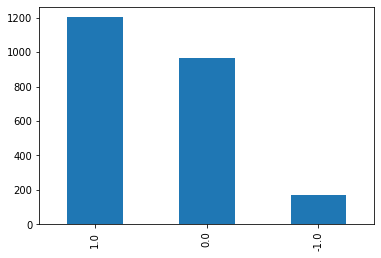

In [ ]:
dfs.track.value_counts().plot.bar()